Final test accuracy: 0.8182


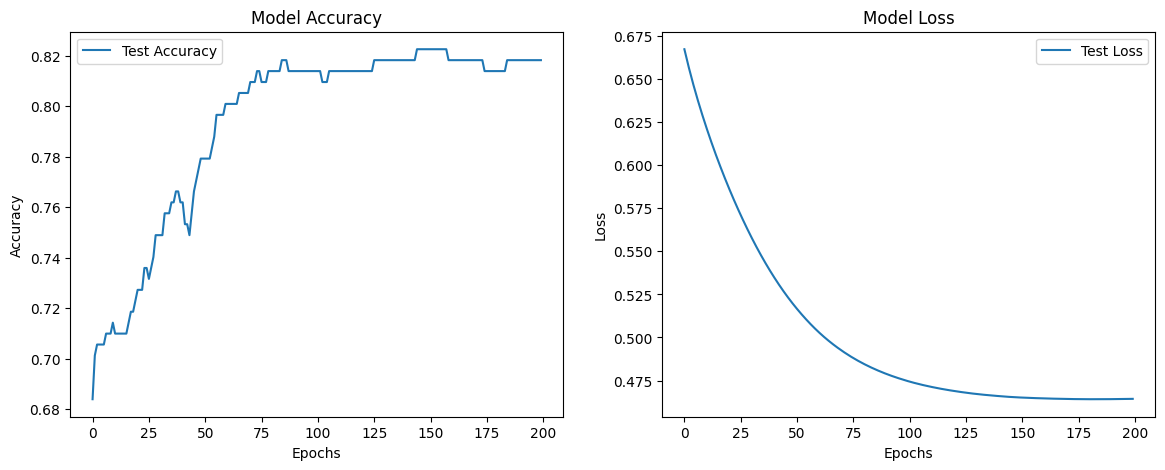

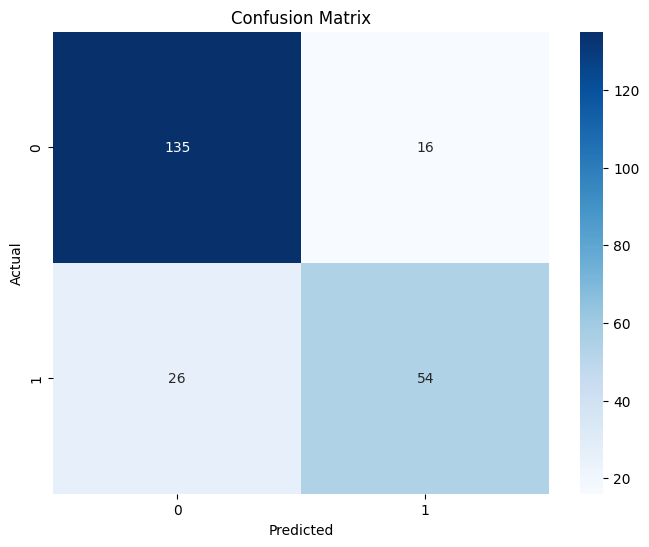

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Read the dataset
file_path = "/kaggle/input/diabets/diabetes.csv"
data = pd.read_csv(file_path)

# Split the data into features and labels
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Split the data into training and testing sets
np.random.seed(10)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

split_index = int(0.7 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Normalize the data
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Initialize network parameters
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
learning_rate = 0.001

np.random.seed(10)
weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.1
weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.1
bias_hidden = np.zeros((1, hidden_size))
bias_output = np.zeros((1, output_size))

# Training the model
epochs = 200
batch_size = 32
test_loss_history = []
test_accuracy_history = []

for epoch in range(epochs):
    for start in range(0, X_train.shape[0], batch_size):
        end = start + batch_size
        batch_X = X_train[start:end]
        batch_y = y_train[start:end].reshape(-1, 1)

        # Forward pass
        hidden_input = np.dot(batch_X, weights_input_hidden) + bias_hidden
        hidden_output = relu(hidden_input)
        final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
        final_output = sigmoid(final_input)

        # Compute loss (binary cross-entropy)
        loss = -np.mean(batch_y * np.log(final_output) + (1 - batch_y) * np.log(1 - final_output))
        
        # Backward pass
        error = final_output - batch_y
        d_final_input = error * sigmoid_derivative(final_output)
        d_weights_hidden_output = np.dot(hidden_output.T, d_final_input)
        d_bias_output = np.sum(d_final_input, axis=0, keepdims=True)

        error_hidden = np.dot(d_final_input, weights_hidden_output.T)
        d_hidden_input = error_hidden * relu_derivative(hidden_output)
        d_weights_input_hidden = np.dot(batch_X.T, d_hidden_input)
        d_bias_hidden = np.sum(d_hidden_input, axis=0, keepdims=True)

        # Update weights and biases
        weights_hidden_output -= learning_rate * d_weights_hidden_output
        bias_output -= learning_rate * d_bias_output
        weights_input_hidden -= learning_rate * d_weights_input_hidden
        bias_hidden -= learning_rate * d_bias_hidden

    # Evaluate on the test set
    hidden_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
    hidden_output_test = relu(hidden_input_test)
    final_input_test = np.dot(hidden_output_test, weights_hidden_output) + bias_output
    final_output_test = sigmoid(final_input_test)
    
    test_loss = -np.mean(y_test.reshape(-1, 1) * np.log(final_output_test) + (1 - y_test.reshape(-1, 1)) * np.log(1 - final_output_test))
    test_predictions = (final_output_test > 0.5).astype(int)
    test_accuracy = np.mean(test_predictions == y_test.reshape(-1, 1))
    
    test_loss_history.append(test_loss)
    test_accuracy_history.append(test_accuracy)

# Final test accuracy
print(f'Final test accuracy: {test_accuracy:.4f}')

# Plot test accuracy over epochs
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(test_accuracy_history, label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot test loss over epochs
plt.subplot(1, 2, 2)
plt.plot(test_loss_history, label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
